In [159]:
import pandas as pd
import numpy as np
import os
import requests
try:
    import urllib2
except ImportError:
    import urllib
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### Read in data

In [33]:
url = 'https://serv.cusp.nyu.edu/~fbianco/PUIdata/WorldFirearmsMurdersAndOwnership.csv'

In [34]:
fire_arm_data = pd.read_csv(url)

In [35]:
fire_arm_data.rename(columns={'Country/Territory':'Country'}, inplace=True)
fire_arm_data.head()

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [74]:
#change directory to PUIDATA
os.environ["PUIDATA"] = "%s/PUIData"%os.getenv("HOME")
os.chdir(os.getenv("PUIDATA"))

In [75]:
#download the guns owned vs mass shootings
download_url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
urllib.request.urlretrieve(download_url, "guns_by_shootings.csv")

guns_by_shootings = pd.read_csv('guns_by_shootings.csv')
guns_by_shootings.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [76]:
#download the population data
pop_download = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'

urllib.request.urlretrieve(pop_download, 'world_population.zip')
os.system("unzip " + os.getenv("PUIDATA") + "/world_population.zip")

world_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv', skiprows=[0,1,2])

world_pop.rename(columns={'Country Name':'Country', '2012':'total_pop'}, inplace=True)
cols = ['Country', 'total_pop']
world_pop = world_pop[cols]
world_pop.head()

,Country,total_pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [77]:
#download GDP data
gdp_download = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'

urllib.request.urlretrieve(gdp_download, 'world_gdp.zip')
os.system("unzip " + os.getenv("PUIDATA") + "/world_gdp.zip")

world_gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', skiprows=[0,1,2])
world_gdp.rename(columns={'Country Name':'Country', '2012':'total_gdp'}, inplace=True)
cols = ['Country', 'total_gdp']
world_gdp = world_gdp[cols]
world_gdp.head()

,Country,total_gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [78]:
#merge all the data together
dfs = [fire_arm_data, guns_by_shootings, world_pop, world_gdp]
world_gun = reduce(lambda left,right: pd.merge(left,right,on='Country'), dfs)

In [79]:
world_gun.rename(columns={'Number of mass shootings (1983-2013)':'mass_shootings',
                          'Guns per 100 inhabitants':'guns_per_100', 
                          'Number of homicides by firearm':'hom_by_firearm',
                          'Average total all civilian firearms':'avg_total_firearms'}, inplace=True)

In [67]:
list(world_gun.columns)

['Country',
 'ISO code',
 'Source',
 '% of homicides by firearm',
 'hom_by_firearm',
 'Homicide by firearm rate per 100,000 pop',
 'Rank by rate of ownership',
 'Average firearms per 100 people',
 'avg_total_firearms',
 'guns_per_100',
 'mass_shootings',
 'total_pop',
 'total_gdp']

In [80]:
cols = ['Country', 'total_pop', 'total_gdp', 'hom_by_firearm','avg_total_firearms',
        'guns_per_100','mass_shootings']
world_gun = world_gun[cols]
world_gun.head()

,Country,total_pop,total_gdp,hom_by_firearm,avg_total_firearms,guns_per_100,mass_shootings
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,15.0,4
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,30.4,1
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,17.2,2
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4
4,Denmark,5591572.0,3.271489e+11,15.0,650000.0,12.0,0


#### Plot mass shootings versus GDP in absolute numbers, and per person.  Show the errorbars (y errors)

##### Mass Shootings versus GDP in Absolute Numbers

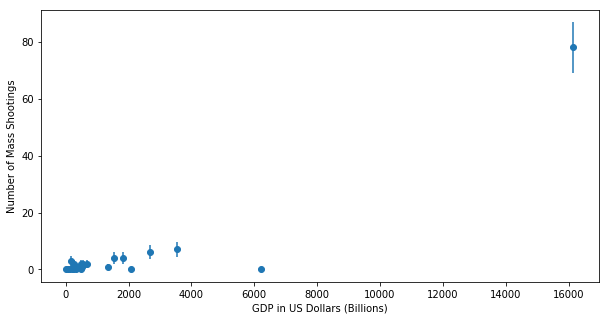

In [81]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(world_gun.total_gdp / 1e9, world_gun.mass_shootings)
ax.errorbar(world_gun.total_gdp / 1e9, world_gun.mass_shootings,
           yerr = np.sqrt(world_gun.mass_shootings * 1.0), fmt = '.')
ax.set_xlabel("GDP in US Dollars (Billions)")
ax.set_ylabel("Number of Mass Shootings")
ax.set_ylim()
plt.show()


Figure showing the number of mass shootings by country versus the total GDP of the country.  Error bars represent the Poisson statistics on the number of mass shootings.  The outlier on the top right corner is the United States, with the highest GDP as well as the highest number of mass shootings.

##### Mass Shootings versus GDP per Person

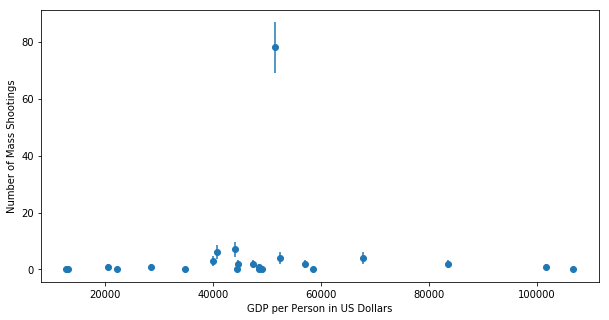

In [82]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(world_gun.total_gdp / world_gun.total_pop, world_gun.mass_shootings)
ax.errorbar(world_gun.total_gdp / world_gun.total_pop, world_gun.mass_shootings,
           yerr = np.sqrt(world_gun.mass_shootings * 1.0), fmt = '.')
ax.set_xlabel("GDP per Person in US Dollars")
ax.set_ylabel("Number of Mass Shootings")
ax.set_ylim()
plt.show()


Figure showing the number of mass shootings by country versus the total GDP per person of the country.  Error bars represent the Poisson statistics on the number of mass shootings.  The outlier on the top middle is the United States, with the highest number of mass shootings.

#### Plot the average number of civilian firearms per person.

##### Average number of civilian firearms per person without errors.

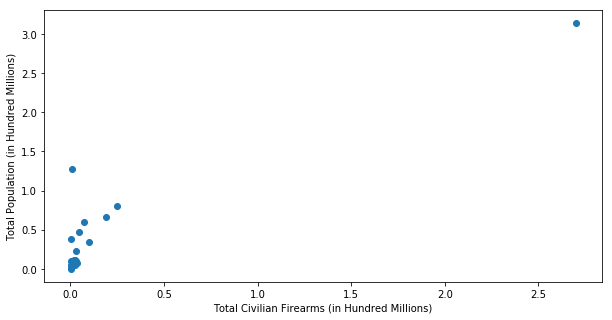

In [100]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(world_gun.avg_total_firearms / 1e8, world_gun.total_pop / 1e8)
ax.set_xlabel("Total Civilian Firearms (in Hundred Millions)")
ax.set_ylabel("Total Population (in Hundred Millions)")
ax.set_ylim()
plt.show()

Figure showing the total population of the country (in hundreds of millions) versus the number of total civilian firearms (also alarmingly in hundred millions).  The outlier on the top right is the United States, with over 300 million citizens and over 270 million civilian firearms.

##### Average number of civilian firearms per person with errors.

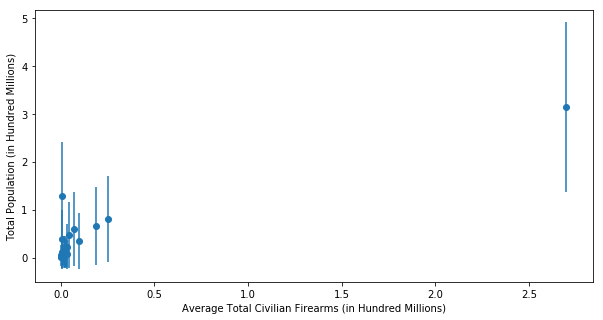

In [105]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(world_gun.avg_total_firearms/ 1e8, world_gun.total_pop / 1e8)
ax.errorbar(world_gun.avg_total_firearms / 1e8, world_gun.total_pop / 1e8,
           yerr = np.sqrt(world_gun.total_pop / 1e8 * 1.0), fmt = '.')
ax.set_xlabel("Average Total Civilian Firearms (in Hundred Millions)")
ax.set_ylabel("Total Population (in Hundred Millions)")
ax.set_ylim()
plt.show()

Figure showing the total population of the country (in hundreds of millions) versus the number of total civilian firearms (also alarmingly in hundred millions).  The outlier on the top right is the United States, with over 300 million citizens and over 270 million civilian firearms. The error bars represent the Poisson statistics on total population.

#### Plot the average number of homicide by firearms per person.

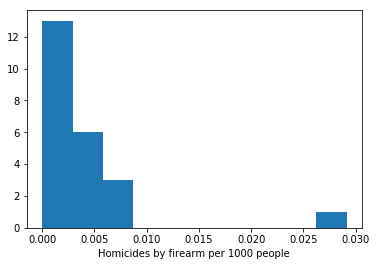

In [106]:
#as a histogram
fig, ax = plt.subplots()
ax.hist(world_gun.hom_by_firearm / world_gun.total_pop * 1000)
ax.set_xlabel("Homicides by firearm per 1000 people")
plt.show()

Figure showing the homicides by firearm per 1000 people.  The majority of countries in the dataset have lower than 0.010 homicides by firearm per 1000 people.  Only one country looks like an outlier, and it is again, the US.

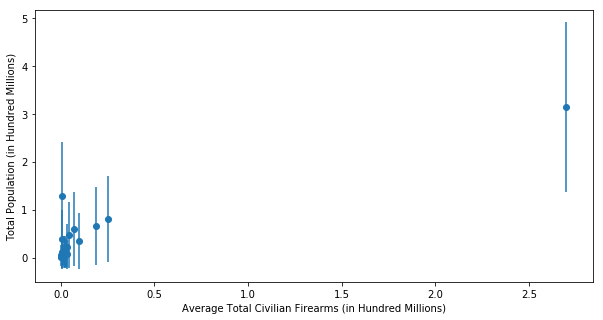

In [117]:
#against country GDP, with statistical errors.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(world_gun.avg_total_firearms/ 1e8, world_gun.total_pop / 1e8)
ax.errorbar(world_gun.avg_total_firearms / 1e8, world_gun.total_pop / 1e8,
           yerr = np.sqrt(world_gun.total_pop / 1e8 * 1.0), fmt = '.')
ax.set_xlabel("Average Total Civilian Firearms (in Hundred Millions)")
ax.set_ylabel("Total Population (in Hundred Millions)")
ax.set_ylim()
plt.show()

Figure showing the total population (in hundreds of millions) versus the total civilian firearms (also in hundreds of millions).  The error bars represent the Poisson statistics on total population.  The outlier on the right is the United States.

#### Plot the number of homicides by firearm against the number of civilian firearms. Plot the US in a different color, with and without error bars.

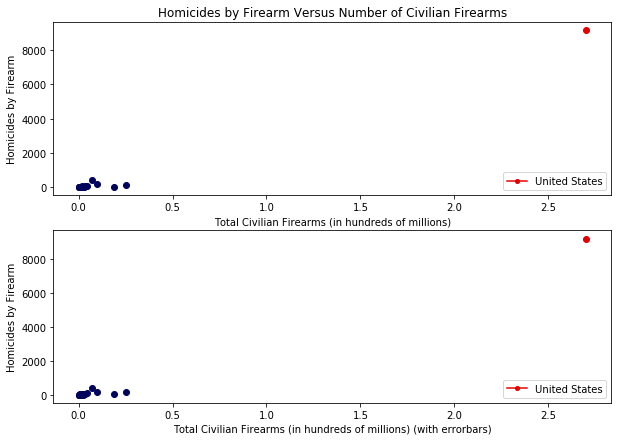

In [157]:
fig = plt.figure(figsize=(10,7))

y1 = world_gun.hom_by_firearm
x1 = world_gun.avg_total_firearms / 1e8
yerrors = np.sqrt(world_gun.hom_by_firearm * 1.0)

color_list = []
for row in world_gun.Country:
    if row != "United States":
        color_list.append('#00035b')
    if row == "United States":
        color_list.append('#e50000')

ax = fig.add_subplot(2, 1, 1) 
for i in range(len(x1)):
    plt.plot(x1[i], y1[i], color=color_list[i], marker='o')
plt.title("Homicides by Firearm Versus Number of Civilian Firearms")
plt.ylabel("Homicides by Firearm")
plt.xlabel("Total Civilian Firearms (in hundreds of millions)")

custom_legend = [Line2D([0],[0], marker='o', color = '#e50000', label='United States', markersize=4)]
ax.legend(handles=custom_legend, loc='lower right')

ax = fig.add_subplot(2, 1, 2)
for i in range(len(x1)):
    plt.errorbar(x1[i], y1[i], yerr = yerrors[i], color=color_list[i], fmt = 'o')
plt.ylabel("Homicides by Firearm")
plt.xlabel("Total Civilian Firearms (in hundreds of millions) (with errorbars)")

custom_legend = [Line2D([0],[0], marker='o', color = '#e50000', label='United States', markersize=4)]
ax.legend(handles=custom_legend, loc='lower right')

plt.show()

Figure showing the total homicides by firearm versus the number of civilian firearms (in the hundreds of millions).  Note in the second figure that the error bars are too small to appear (Poisson error for the US homicides by firearm for example is < 100, which on this scale is hard to see).

#### Plot the number of mass shootings against the number of civilian firearms. Plot the US in a different color, with and without error bars.

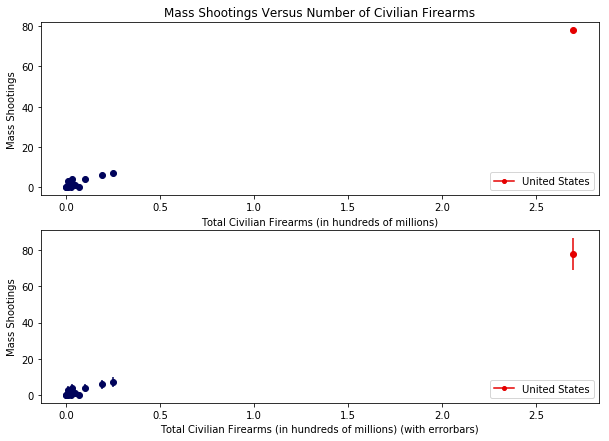

In [158]:
fig = plt.figure(figsize=(10,7))

y1 = world_gun.mass_shootings
x1 = world_gun.avg_total_firearms / 1e8
yerrors = np.sqrt(world_gun.mass_shootings * 1.0)

color_list = []
for row in world_gun.Country:
    if row != "United States":
        color_list.append('#00035b')
    if row == "United States":
        color_list.append('#e50000')

ax = fig.add_subplot(2, 1, 1) 
for i in range(len(x1)):
    plt.plot(x1[i], y1[i], color=color_list[i], marker='o')
plt.title("Mass Shootings Versus Number of Civilian Firearms")
plt.ylabel("Mass Shootings")
plt.xlabel("Total Civilian Firearms (in hundreds of millions)")

custom_legend = [Line2D([0],[0], marker='o', color = '#e50000', label='United States', markersize=4)]
ax.legend(handles=custom_legend, loc='lower right')

ax = fig.add_subplot(2, 1, 2)
for i in range(len(x1)):
    plt.errorbar(x1[i], y1[i], yerr = yerrors[i], color=color_list[i], fmt = 'o')
plt.ylabel("Mass Shootings")
plt.xlabel("Total Civilian Firearms (in hundreds of millions) (with errorbars)")

custom_legend = [Line2D([0],[0], marker='o', color = '#e50000', label='United States', markersize=4)]
ax.legend(handles=custom_legend, loc='lower right')

plt.show()

Figure showing the number of mass shootings versus the total civilian firearms in a country (in the hundreds of millions).

## Modeling

#### Fit a line to the number of mass shootings per person as a function of average total of all civilian firearms per person.